In [10]:
from AIS_for_SLDCP import *

In [11]:
import os
files = [i[:-5] for i in  os.listdir() if i.endswith('xlsx') and i.startswith('Prob')]

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import numpy as np

In [3]:
x = np.array([[1,0,1],[2,2,2]])
x[0:2,2]

array([1, 2])

In [13]:
files = pd.Series(files).sort_values()

ProblemStochastic 10X10_01
ProblemStochastic 10X10_02
ProblemStochastic 10X10_03
ProblemStochastic 15X10_01
ProblemStochastic 15X10_02
ProblemStochastic 15X10_03
ProblemStochastic 5X10_01
ProblemStochastic 5X10_02
ProblemStochastic 5X10_03
ProblemStochastic 5X5_01
ProblemStochastic 5X5_02
ProblemStochastic 5X5_03


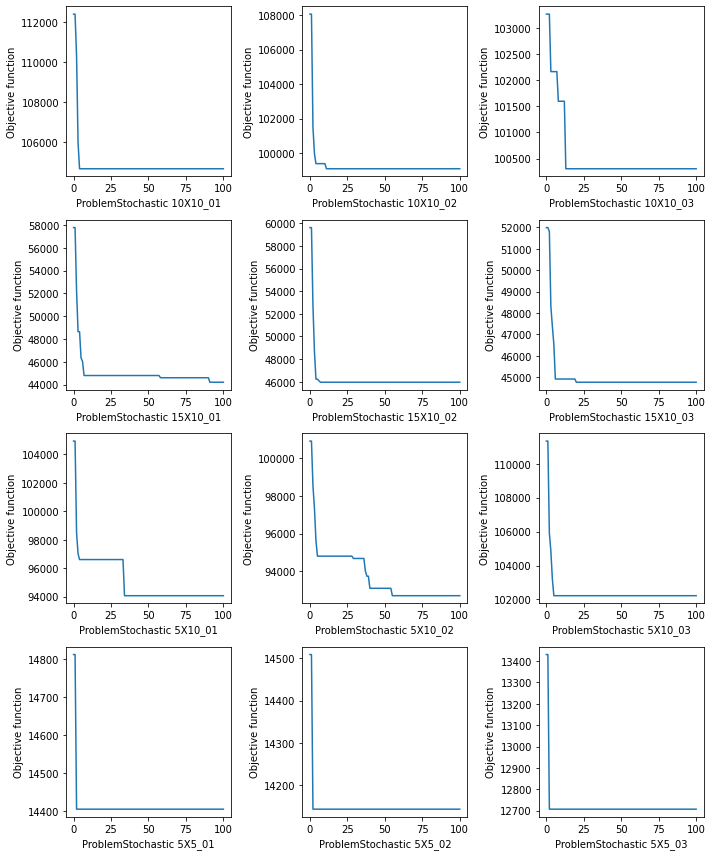

In [5]:
Results = pd.DataFrame(columns=['MaxItr', 'CN', 'PN'])
cnt = 0
plt.figure(figsize=(10, 12))
MaxItr, CN, PN = 100, 100, 100
for i in files:
    sol = AISforFLDCP(MaxItr, CN, PN, i)
    Results = pd.concat([Results,pd.DataFrame(sol[2], columns=['MaxItr', 'CN', 'PN'])])
    print(i)
    cnt += 1
    plt.subplot(4, 3, cnt)
    plt.plot(sol[3])
    plt.xlabel(i)
    plt.ylabel('Objective function')
    plt.tight_layout()

In [6]:
Results.to_excel('ProposedLevels.xlsx', index = False)

<AxesSubplot:xlabel='CN'>

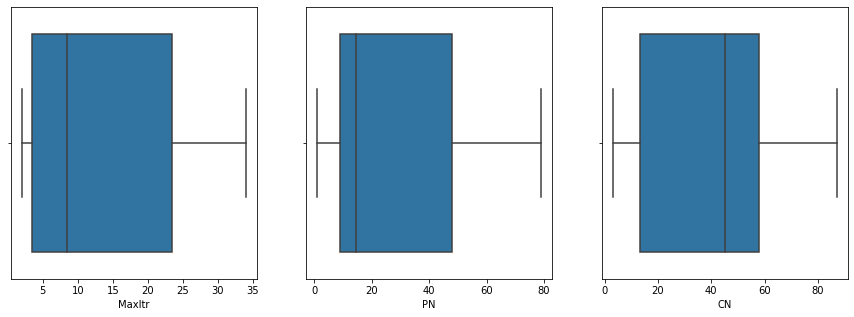

In [25]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x = Results['MaxItr'], showfliers=False)
plt.subplot(1, 3, 2)
sns.boxplot(x = Results['PN'], showfliers=False)
plt.subplot(1, 3, 3)
sns.boxplot(x = Results['CN'], showfliers=False)

In [76]:
pd.DataFrame([Results['MaxItr'].astype(float).describe(), Results['PN'].astype(float).describe(), Results['CN'].astype(float).describe()]).to_excel('SummaryStatistics.xlsx', index =False)

In [78]:
pd.DataFrame([Results['MaxItr'].astype(float).describe(), Results['PN'].astype(float).describe(), Results['CN'].astype(float).describe()])

,count,mean,std,min,25%,50%,75%,max
MaxItr,12.0,20.416667,27.367726,2.0,3.50,8.5,23.5,91.0
PN,12.0,28.083333,26.722338,1.0,8.75,14.5,48.0,79.0
CN,12.0,41.333333,29.843024,3.0,13.25,45.0,58.0,87.0


In [31]:
MaxItr= [5, 10, 15, 20, 25]
PN= [10, 20, 30, 40, 50]
CN= [20, 30, 40, 50, 60]

In [47]:
DOEDesing = pd.read_excel('DOE.xlsx')

In [2]:
5 ** 4

625

In [48]:
DOEDesing.columns = ['MaxItr', 'PN', 'CN']

In [49]:
DOEDesing['MaxItr'] = DOEDesing['MaxItr'].apply(lambda x:MaxItr[x-1])
DOEDesing['PN'] = DOEDesing['PN'].apply(lambda x:PN[x-1])
DOEDesing['CN'] = DOEDesing['CN'].apply(lambda x:CN[x-1])

In [57]:
DOEDesing['Respons'] = None
for i in range(DOEDesing.shape[0]):
    MaxItr = DOEDesing.loc[i]['MaxItr']
    PN = DOEDesing.loc[i]['PN']
    CN = DOEDesing.loc[i]['CN']
    DOEDesing.loc[i, 'Response'] = AISforFLDCP(MaxItr, CN, PN, 'ProblemStochastic 15X10_03')[0]
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124


In [58]:
DOEDesing.to_excel('DOEOutputs.xlsx', index = False)

In [62]:
MaxItr= [5, 10, 15, 20, 25]
PN= [10, 20, 30, 40, 50]
CN= [20, 30, 40, 50, 60]

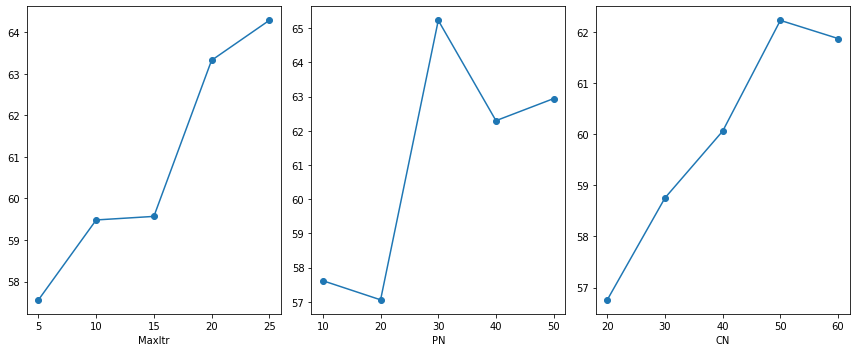

In [72]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.plot([str(i) for i in MaxItr],DOEDesing.groupby('MaxItr').agg({'Response':lambda x:10 * np.log(np.mean(x)**2/np.std(x)**2)}), '-o')
plt.xlabel('MaxItr')
plt.subplot(1, 3, 2)
plt.plot([str(i) for i in PN],DOEDesing.groupby('PN').agg({'Response':lambda x:10 * np.log(np.mean(x)**2/np.std(x)**2)}), '-o')
plt.xlabel('PN')
plt.subplot(1, 3, 3)
plt.plot([str(i) for i in CN],DOEDesing.groupby('CN').agg({'Response':lambda x:10 * np.log(np.mean(x)**2/np.std(x)**2)}), '-o')
plt.xlabel('CN')
plt.tight_layout()

In [87]:
ComputationalResults = pd.DataFrame(columns=['Problem Name', 'Mean', 'RSD'])
Alpha = 0.6
cnt = 0
MaxItr, CN, PN = 25, 30, 50
for i in files:
    Outputs = np.array([AISforFLDCP(MaxItr, CN, PN, i, Alpha)[0] for _ in range(10)])
    Mean = Outputs.mean()
    std = Outputs.std()
    RSD = std/Mean
    ComputationalResults.loc[cnt] = [i, Mean, RSD]
    print(i)
    cnt += 1

ProblemStochastic 10X10_01
ProblemStochastic 10X10_02
ProblemStochastic 10X10_03
ProblemStochastic 15X10_01
ProblemStochastic 15X10_02
ProblemStochastic 15X10_03
ProblemStochastic 5X10_01
ProblemStochastic 5X10_02
ProblemStochastic 5X10_03
ProblemStochastic 5X5_01
ProblemStochastic 5X5_02
ProblemStochastic 5X5_03


In [88]:
ComputationalResults.to_excel('Computational_0.6.xlsx', index=False)

In [89]:
ComputationalResults = pd.DataFrame(columns=['Problem Name', 'Mean', 'RSD'])
Alpha = 0.8
cnt = 0
MaxItr, CN, PN = 25, 30, 50
for i in files:
    Outputs = np.array([AISforFLDCP(MaxItr, CN, PN, i, Alpha)[0] for _ in range(10)])
    Mean = Outputs.mean()
    std = Outputs.std()
    RSD = std/Mean
    ComputationalResults.loc[cnt] = [i, Mean, RSD]
    print(i)
    cnt += 1

ComputationalResults.to_excel('Computational_0.8.xlsx', index=False)

,Problem Name,Mean,RSD
0,ProblemStochastic 10X10_01,106818.7,0.018183
1,ProblemStochastic 10X10_02,97805.4,0.016613
2,ProblemStochastic 10X10_03,99859.8,0.012127
3,ProblemStochastic 15X10_01,44861.8,0.054380
4,ProblemStochastic 15X10_02,46783.6,0.044963
5,ProblemStochastic 15X10_03,49063.7,0.039169
6,ProblemStochastic 5X10_01,95995.1,0.014770
7,ProblemStochastic 5X10_02,95968.1,0.020716
8,ProblemStochastic 5X10_03,104302.6,0.014796
9,ProblemStochastic 5X5_01,14434.5,0.001927


In [8]:
import pandas as pd